<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/Dimensionality_Reductions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Dimensionality Reduction for Machine Learning

*Ref: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/*

*Ref2: https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/*

The number of input variables or features for a dataset is referred to as its dimensionality.

Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.

High-dimensionality statistics and dimensionality reduction techniques are often used for data visualization. Nevertheless these techniques can be used in applied machine learning to simplify a classification or regression dataset in order to better fit a predictive model.

#Overview

This tutorial is divided into three parts; they are:

1. Problem With Many Input Variables
2. Dimensionality Reduction
3. Techniques for Dimensionality Reduction
> 1. Feature Selection Methods
> 2. Matrix Factorization
> 3. Manifold Learning
> 4. Autoencoder Methods
> 5. Tips for Dimensionality Reduction

#Problem With Many Input Variables

The performance of machine learning algorithms can degrade with too many input variables.

If your data is represented using rows and columns, such as in a spreadsheet, then the input variables are the columns that are fed as input to a model to predict the target variable. Input variables are also called features.

We can consider the columns of data representing dimensions on an n-dimensional feature space and the rows of data as points in that space. This is a useful geometric interpretation of a dataset.

Having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample.

This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the “curse of dimensionality.”

Therefore, it is often desirable to reduce the number of input features.

This reduces the number of dimensions of the feature space, hence the name “dimensionality reduction.”

##What is the curse of dimensionality?

The curse of dimensionality refers to the phenomena that occur when classifying, organizing, and analyzing high dimensional data that does not occur in low dimensional spaces, specifically the issue of data sparsity and “closeness” of data.

**Issues**

Sparsity of data occurs when moving to higher dimensions. the volume of the space represented grows so quickly that the data cannot keep up and thus becomes sparse, as seen below.  The sparsity issue is a major one for anyone whose goal has some statistical significance.

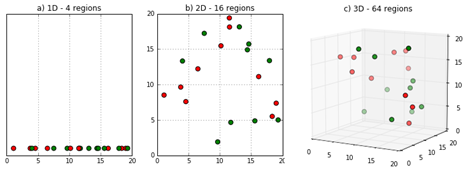

As the data space seen above moves from one dimension to two dimensions and finally to three dimensions, the given data fills less and less of the data space.  In order to maintain an accurate representation of the space, the data for analysis grows exponentially.

The second issue that arises is related to sorting or classifying the data.  In low dimensional spaces, data may seem very similar but the higher the dimension the further these data points may seem to be.  The two wind turbines below seem very close to each other in two dimensions but separate when viewed in a third dimension.  This is the same effect the curse of dimensionality has on data.

**Infinite Features Requires Infinite Training**

When neural networks are created they are instantiated with a certain number of features (dimensions). Each datum has individual aspects, each aspect falling somewhere along each dimension. In our fruit example we may want one feature handling color, one for weight, one for shape, etc. Each feature adds information, and if we could handle every feature possible we could tell perfectly which fruit we are considering. However, an infinite number of features requires an infinite number of training examples, eliminating the real-world usefulness of our network. 

Most disconcerting, the number of training data needed increases exponentially with each added feature. Even if we only had 15 features each being one ‘yes’ or ‘no’ question about the piece fruit we are identifying, this would require a training set on the order of 21532,000 training sample.

#Dimensionality Reduction

Dimensionality reduction refers to techniques for reducing the number of input variables in training data.

When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data. This is called dimensionality reduction.

*Ref: Page 11, Machine Learning: A Probabilistic Perspective, 2012.*

High-dimensionality might mean hundreds, thousands, or even millions of input variables.

Fewer input dimensions often mean correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and therefore may not perform well on new data.

It is desirable to have simple models that generalize well, and in turn, input data with few input variables. This is particularly true for linear models where the number of inputs and the degrees of freedom of the model are often closely related.

The fundamental reason for the curse of dimensionality is that high-dimensional functions have the potential to be much more complicated than low-dimensional ones, and that those complications are harder to discern. The only way to beat the curse is to incorporate knowledge about the data that is correct.

*Ref: Page 15, Pattern Classification, 2000.*

Dimensionality reduction is a data preparation technique performed on data prior to modeling. It might be performed after data cleaning and data scaling and before training a predictive model.

As such, any dimensionality reduction performed on training data must also be performed on new data, such as a test dataset, validation dataset, and data when making a prediction with the final model.

#Techniques for Dimensionality Reduction

There are many techniques that can be used for dimensionality reduction.

##Feature Selection Methods

Perhaps the most common are so-called feature selection techniques that use scoring or statistical methods to select which features to keep and which features to delete.

Key point why we do feature selection

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

Two main classes of feature selection techniques include wrapper methods and filter methods.

* Feature Selection: Select a subset of input features from the dataset.
 * Unsupervised: Do not use the target variable (e.g. remove redundant variables).
 * Correlation
* Supervised: Use the target variable (e.g. remove irrelevant variables).
 * Wrapper: Search for well-performing subsets of features.
   * RFE
 * Filter: Select subsets of features based on their relationship with the target.
   * Statistical Methods
   * Feature Importance Methods
 * Intrinsic: Algorithms that perform automatic feature selection during training.
   * Decision Trees

The image below provides a summary of this hierarchy of feature selection techniques.

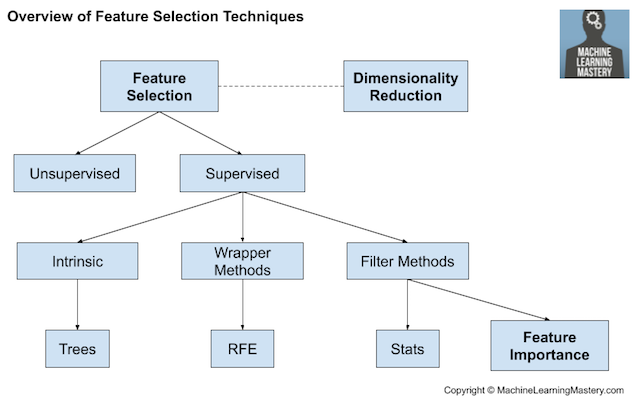

##Wrapper methods

as the name suggests, wrap a machine learning model, fitting and evaluating the model with different subsets of input features and selecting the subset the results in the best model performance. RFE is an example of a wrapper feature selection method.

###Recursive Feature Elimination (RFE)

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

###RFE for Classification

In [2]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.889 (0.034)


In [5]:
print(n_scores)

[0.88 0.81 0.89 0.9  0.87 0.93 0.88 0.87 0.92 0.92 0.92 0.86 0.89 0.91
 0.85 0.94 0.82 0.86 0.92 0.91 0.91 0.94 0.91 0.82 0.9  0.84 0.91 0.89
 0.9  0.89]


In [3]:
print(X,y)

[[ 2.56999479 -0.13019997  3.16075093 ... -1.93094078  3.26130366
   2.05692145]
 [ 0.34129317  2.51321418 -0.80416572 ...  6.24734437 -1.92769365
   2.9503149 ]
 [ 2.27539972  3.36561455  0.17164362 ...  2.74693781  0.13492444
   2.00339547]
 ...
 [ 0.5234359   1.90466429  0.93243365 ...  1.53945231  1.90646166
   1.99458587]
 [ 1.33747921  3.25859684  0.78792366 ...  5.18788314 -0.82071083
   3.51411431]
 [-0.98534299  0.83919047  2.5820803  ...  3.04705685  0.66885641
   3.32838496]] [1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1

###RFE for Regression

In [6]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.352 (2.648)


Example

>2 0.714 (0.041)
>3 0.814 (0.037)
>4 0.871 (0.028)
>5 0.883 (0.027)
>6 0.889 (0.034)
>7 0.885 (0.031)
>8 0.885 (0.028)
>9 0.881 (0.027)


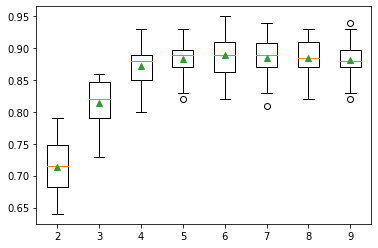

In [7]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##Filter methods 
use scoring methods, like correlation between the feature and the target variable, to select a subset of input features that are most predictive. Examples include Pearson’s correlation and Chi-Squared test.

###Statistics for Filter-Based Feature Selection Methods

It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection.

As such, the choice of statistical measures is highly dependent upon the variable data types.

Common data types include numerical (such as height) and categorical (such as a label), although each may be further subdivided such as integer and floating point for numerical variables, and boolean, ordinal, or nominal for categorical variables.

Common input variable data types:

* Numerical Variables
 * Integer Variables.
 * Floating Point Variables.
* Categorical Variables.
 * Boolean Variables (dichotomous).
 * Ordinal Variables.
 * Nominal Variables.

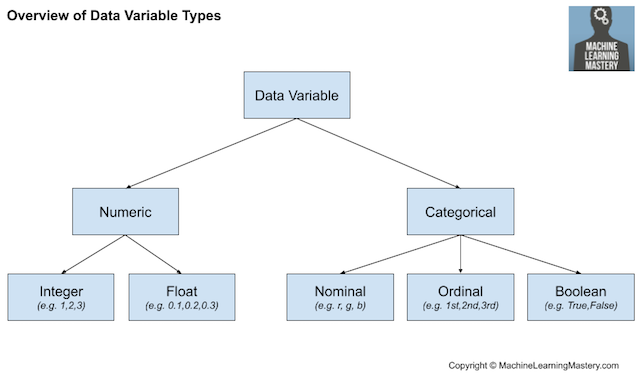

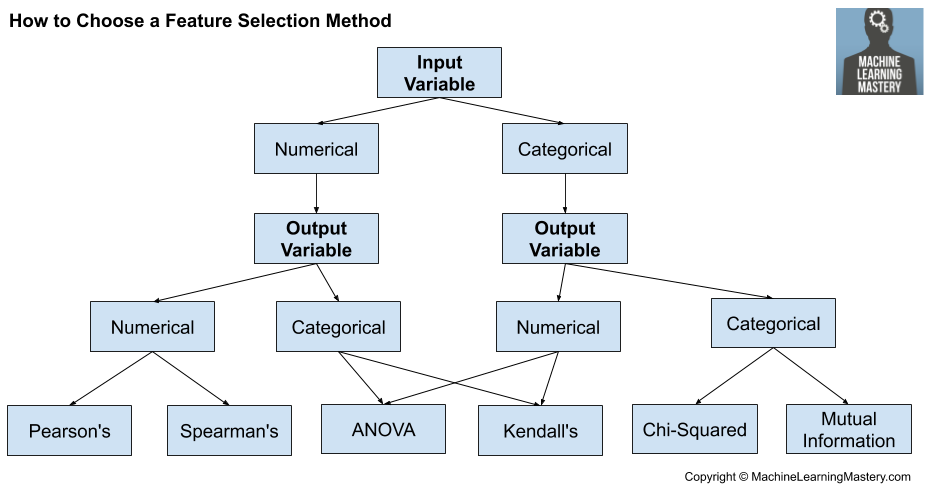

####Regression Feature Selection
(Numerical Input, Numerical Output)
This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs.

A test regression problem is prepared using the make_regression() function.

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

In [9]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


####Classification Feature Selection
(Numerical Input, Categorical Output)
This section demonstrates feature selection for a classification problem that as numerical inputs and categorical outputs.

A test regression problem is prepared using the make_classification() function.

Feature selection is performed using ANOVA F measure via the f_classif() function.

In [12]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)


###Coefficients as Feature Importance

*Ref: https://machinelearningmastery.com/calculate-feature-importance-with-python/*

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

Let’s take a closer look at using coefficients as feature importance for classification and regression. We will fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and finally create a bar chart to get an idea of the relative importance of the features.

####Linear Regression Feature Importance
We can fit a LinearRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The complete example of linear regression coefficients for feature importance is listed below.

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


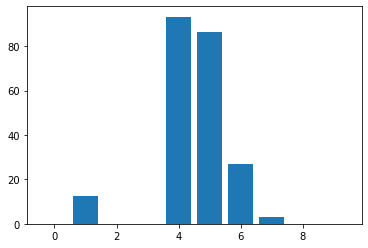

In [14]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####Logistic Regression Feature Importance
We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The complete example of logistic regression coefficients for feature importance is listed below.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


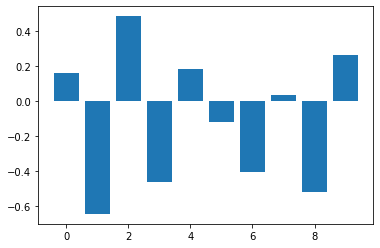

In [15]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####Decision Tree Feature Importance
Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

Let’s take a look at a worked example of each.

CART Feature Importance
We can use the CART algorithm for feature importance implemented in scikit-learn as the DecisionTreeRegressor and DecisionTreeClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

Let’s take a look at an example of this for regression and classification.

CART Regression Feature Importance
The complete example of fitting a DecisionTreeRegressor and summarizing the calculated feature importance scores is listed below.

Feature: 0, Score: 0.00254
Feature: 1, Score: 0.00476
Feature: 2, Score: 0.00263
Feature: 3, Score: 0.00132
Feature: 4, Score: 0.51637
Feature: 5, Score: 0.43785
Feature: 6, Score: 0.02724
Feature: 7, Score: 0.00352
Feature: 8, Score: 0.00277
Feature: 9, Score: 0.00099


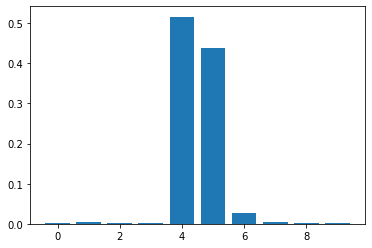

In [16]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

CART Classification Feature Importance
The complete example of fitting a DecisionTreeClassifier and summarizing the calculated feature importance scores is listed below.

Feature: 0, Score: 0.00660
Feature: 1, Score: 0.02238
Feature: 2, Score: 0.18957
Feature: 3, Score: 0.29655
Feature: 4, Score: 0.09821
Feature: 5, Score: 0.01460
Feature: 6, Score: 0.16178
Feature: 7, Score: 0.03837
Feature: 8, Score: 0.12929
Feature: 9, Score: 0.04265


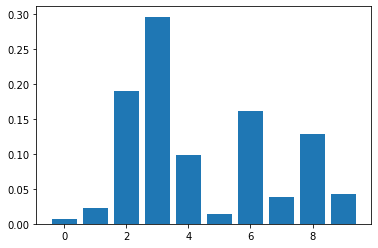

In [17]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####Random Forest Feature Importance
We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the RandomForestRegressor and RandomForestClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the bagging and extra trees algorithms.

Let’s take a look at an example of this for regression and classification.

Random Forest Regression Feature Importance
The complete example of fitting a RandomForestRegressor and summarizing the calculated feature importance scores is listed below.

Feature: 0, Score: 0.00286
Feature: 1, Score: 0.00548
Feature: 2, Score: 0.00286
Feature: 3, Score: 0.00281
Feature: 4, Score: 0.52570
Feature: 5, Score: 0.42578
Feature: 6, Score: 0.02574
Feature: 7, Score: 0.00307
Feature: 8, Score: 0.00307
Feature: 9, Score: 0.00263


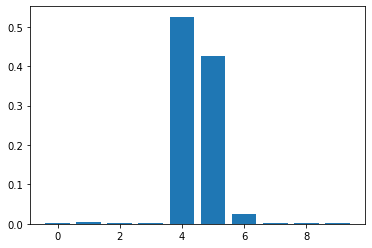

In [18]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Random Forest Classification Feature Importance
The complete example of fitting a RandomForestClassifier and summarizing the calculated feature importance scores is listed below.

Feature: 0, Score: 0.06473
Feature: 1, Score: 0.11335
Feature: 2, Score: 0.15885
Feature: 3, Score: 0.17372
Feature: 4, Score: 0.08199
Feature: 5, Score: 0.12188
Feature: 6, Score: 0.10878
Feature: 7, Score: 0.04544
Feature: 8, Score: 0.08655
Feature: 9, Score: 0.04471


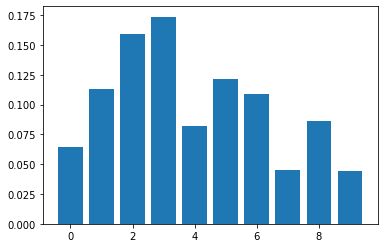

In [19]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####Permutation Feature Importance
Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.

Permutation feature selection can be used via the permutation_importance() function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function.

Let’s take a look at this approach to feature selection with an algorithm that does not support feature selection natively, specifically k-nearest neighbors.

Permutation Feature Importance for Regression
The complete example of fitting a KNeighborsRegressor and summarizing the calculated permutation feature importance scores is listed below.

Feature: 0, Score: 168.46578
Feature: 1, Score: 289.15383
Feature: 2, Score: 163.01875
Feature: 3, Score: 37.88124
Feature: 4, Score: 9502.46798
Feature: 5, Score: 8266.13567
Feature: 6, Score: 941.53195
Feature: 7, Score: 117.81902
Feature: 8, Score: 101.47497
Feature: 9, Score: 115.19941


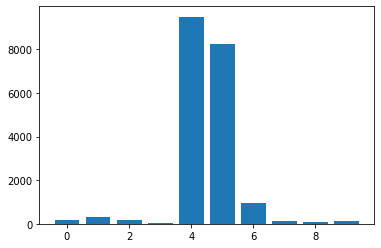

In [20]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Permutation Feature Importance for Classification
The complete example of fitting a KNeighborsClassifier and summarizing the calculated permutation feature importance scores is listed below.

Feature: 0, Score: 0.05060
Feature: 1, Score: 0.05940
Feature: 2, Score: 0.04940
Feature: 3, Score: 0.09540
Feature: 4, Score: 0.04580
Feature: 5, Score: 0.05500
Feature: 6, Score: 0.07400
Feature: 7, Score: 0.05420
Feature: 8, Score: 0.05500
Feature: 9, Score: 0.02800


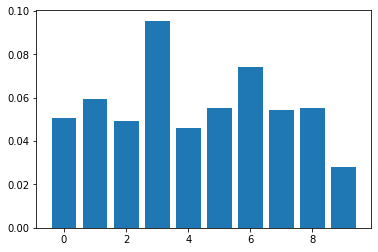

In [21]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####Feature Importance in action

Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.

We can demonstrate this with a small example.

Recall, our synthetic dataset has 1,000 examples each with 10 input variables, five of which are redundant and five of which are important to the outcome. We can use feature importance scores to help select the five variables that are relevant and only use them as inputs to a predictive model.

First, we can split the training dataset into train and test sets and train a model on the training dataset, make predictions on the test set and evaluate the result using classification accuracy. We will use a logistic regression model as the predictive model.

This provides a baseline for comparison when we remove some features using feature importance scores.

The complete example of evaluating a logistic regression model using all features as input on our synthetic dataset is listed below.

In [22]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


Given that we created the dataset, we would expect better or the same results with half the number of input variables.

We could use any of the feature importance scores explored above, but in this case we will use the feature importance scores provided by random forest.

We can use the SelectFromModel class to define both the model we wish to calculate importance scores, RandomForestClassifier in this case, and the number of features to select, 5 in this case.

In [23]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


#Matrix Factorization

Techniques from linear algebra can be used for dimensionality reduction.

Specifically, matrix factorization methods can be used to reduce a dataset matrix into its constituent parts.

Examples include the eigendecomposition and singular value decomposition.

The most common method for ranking the components is principal components analysis, or PCA for short. << Next time


#Manifold Learning

Techniques from high-dimensionality statistics can also be used for dimensionality reduction.

In mathematics, a projection is a kind of function or mapping that transforms data in some way.

These techniques are sometimes referred to as “manifold learning” and are used to create a low-dimensional projection of high-dimensional data, often for the purposes of data visualization.

The projection is designed to both create a low-dimensional representation of the dataset whilst best preserving the salient structure or relationships in the data.

Examples of manifold learning techniques include:

* Kohonen Self-Organizing Map (SOM).
* Sammons Mapping
* Multidimensional Scaling (MDS)
* t-distributed Stochastic Neighbor Embedding (t-SNE).

The features in the projection often have little relationship with the original columns, e.g. they do not have column names, which can be confusing to beginners.

#Autoencoder Methods

Deep learning neural networks can be constructed to perform dimensionality reduction.

A popular approach is called autoencoders. This involves framing a self-supervised learning problem where a model must reproduce the input correctly.

After training, the decoder is discarded and the output from the bottleneck is used directly as the reduced dimensionality of the input. Inputs transformed by this encoder can then be fed into another model, not necessarily a neural network model.

Deep autoencoders are an effective framework for nonlinear dimensionality reduction. Once such a network has been built, the top-most layer of the encoder, the code layer hc, can be input to a supervised classification procedure.

The output of the encoder is a type of projection, and like other projection methods, there is no direct relationship to the bottleneck output back to the original input variables, making them challenging to interpret.

For an example of an autoencoder, LSTM